In [2]:
import json

import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [70]:
def plot(logpath, env, savedir):
    sns.set()

    with open(logpath, 'r') as logfile:
        logs = pd.read_json(logfile)
        
    episode = logs['episode']
    sender = pd.DataFrame([s for s in logs['sender']], index=episode)
    recver = pd.DataFrame([s for s in logs['recver']], index=episode)

            # for line in logfile:
            # logline = json.loads(line)
            # episode.append(logline['episode'])
            # for key in sender.keys():
                # sender[key].append(logline['sender'][key])
            # for key in recver.keys():
                # recver[key].append(logline['recver'][key])

    # REWARDS

    sns.lineplot(data=sender, x=sender.index, y="reward", label="sender")
    sns.lineplot(data=recver, x=recver.index, y="reward", label="recver")
    sns.lineplot(x=sender.index, y=(sender['reward'] + recver['reward'])/2, label='avg')
#     plt.plot(x, running_mean(avg_rew, 100), label='avg reward')
#     plt.plot(x, running_mean(srew, 100), label='sender')
#     plt.plot(x, running_mean(rrew, 100), label='recver')
    nocomm_loss = torch.tensor(env.observation_space.n / 4)
    nocomm_rew = env._reward(nocomm_loss)
    oneshot_loss = (env.bias_space.range) / 4
    oneshot_rew = env._reward(oneshot_loss)
#     perfect_rew = env._reward(oneshot_loss / env.num_rounds)
    plt.axhline(nocomm_rew, label='nocomm baseline')
    plt.axhline(oneshot_rew, label='one-shot baseline')
#     plt.axhline(perfect_rew, label='perfect agent')
    plt.legend()
    if savedir:
        plt.savefig(f'{savedir}/rewards.png')
    plt.show()
    plt.clf()

    # REWARD PER ROUND
#     sround = np.array(sender['round_reward'])
#     rround = np.array(recver['round_reward'])
#     avg_round = (sround + rround) / 2
#     for r in range(env.num_rounds):
#         # plt.plot(x, running_mean(avg_round[:,r]), label='avg_round-{}'.format(r))
#         # plt.plot(x, running_mean(sround[:,r]), label='sender-{}'.format(r))
#         plt.plot(x, running_mean(rround[:,r]), label='recver-{}'.format(r))
#     plt.axhline(oneshot_rew, label='one-shot baseline')
#     plt.legend()
#     if savedir:
#         plt.savefig(f'{savedir}/round.png')
#     plt.show()
#     plt.clf()

    # WEIGHTS
    # weights = np.array(recver['weights'])
    # biases = np.array(recver['biases'])[:,np.newaxis]
    # num_weights = weights.shape[1]
    # for i in range(num_weights):
        # plt.plot(x, running_mean(weights[:,i]), label=f'weight {i}')
        # plt.plot(x, running_mean(biases[:,i]), label=f'bias {i}')
    # plt.title('Weights')
    # plt.legend()
    # if savedir:
        # plt.savefig(f'{savedir}/weights.png')
    # plt.show()

    # # ABS DIFF AT ROUND 5
    # plt.plot(x, running_mean(env.send_diffs), label='sender')
    # plt.plot(x, running_mean(env.recv_diffs), label='recver')
    # plt.title('Absolute diff at Round 5')
    # plt.legend()
    # if savedir:
        # plt.savefig(f'{savedir}/diff.png')
    # plt.show()

    # Sender and Recver Output Samples
    for sample in ["0", "15", "30"]:
        sns.lineplot(data=sender, x=sender.index, y=sample, label=sample)

    plt.title('Sender output samples')
    plt.ylabel('')
    plt.legend()
    if savedir:
        plt.savefig(f'{savedir}/send_samples.png')
    plt.show()
    plt.clf()

    for sample in ["0", "15", "30"]:
        sns.lineplot(data=recver, x=recver.index, y=sample, label=sample)
    plt.title('Recver output samples')
    plt.legend()
    if savedir:
        plt.savefig(f'{savedir}/recv_samples.png')
    plt.show()
    plt.clf()

    # # ENTROPY
    # if 'entropy' in recver:
        # plt.plot(x, recver['entropy'], label='entropy')
        # plt.legend()
        # if savedir:
            # plt.savefig(f'{savedir}/entropy.png')
        # plt.show()


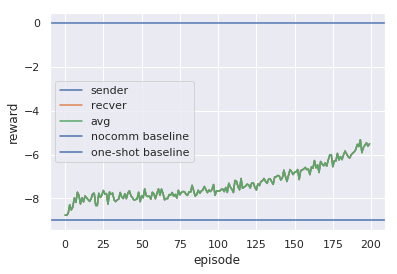

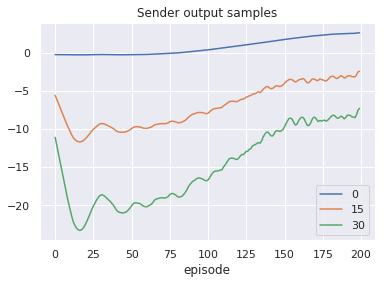

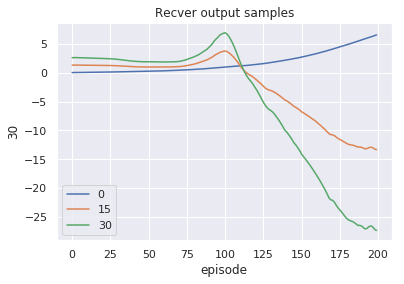

<Figure size 432x288 with 0 Axes>

In [71]:
from src.game import ISR

game = ISR(
    batch_size=128,
    max_bias=0,
    num_rounds=10,
    num_targets=36)

logpath = '../results/test/logs.json'

with sns.plotting_context('paper'):
    plot('../results/test/logs.json', game, None)


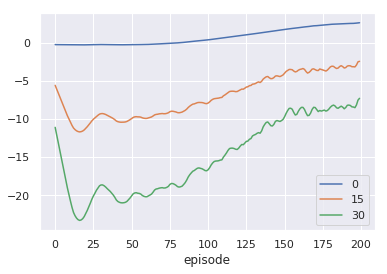

In [68]:
with open(logpath, 'r') as logfile:
    logs = pd.read_json(logfile)
    
episode = logs['episode']
sender = pd.DataFrame([s for s in logs['sender']], index=episode)
recver = pd.DataFrame([s for s in logs['recver']], index=episode)

# sns.lineplot(data=sender, x=sender.index, y="loss", label="sender")
# sns.lineplot(data=recver, x=recver.index, y="loss", label="recver")
# sns.lineplot(x=sender.index, y=(sender['loss'] + recver['loss'])/2, label='avg')

for sample in ["0", "15", "30"]:
    sns.lineplot(data=sender, x=sender.index, y=sample, label=sample)


# sns.lineplot(data=sender, x=sender.index, y="round_reward", label="sender")
# plt.title("Round")
plt.ylabel('')
plt.legend()

In [36]:
sender['reward'] 
recver['reward']

episode
0     -8.756631
1     -8.768877
2     -8.671164
3     -8.285078
4     -8.518808
5     -8.385880
6     -7.978364
7     -8.177343
8     -7.720210
9     -7.856195
10    -8.249321
11    -7.970696
12    -8.152328
13    -7.885793
14    -7.967401
15    -8.045729
16    -8.134551
17    -8.007986
18    -7.783173
19    -7.767828
20    -8.318595
21    -8.322487
22    -7.765077
23    -7.956625
24    -7.840635
25    -7.636079
26    -7.802016
27    -7.777395
28    -8.256731
29    -7.705230
         ...   
171   -6.526066
172   -6.253011
173   -6.023417
174   -6.006133
175   -6.556151
176   -6.278447
177   -6.302424
178   -5.948603
179   -6.247480
180   -6.092955
181   -6.232157
182   -6.016069
183   -5.841074
184   -5.967742
185   -6.096797
186   -6.164032
187   -6.015663
188   -5.937379
189   -5.884656
190   -5.769182
191   -5.537972
192   -5.635118
193   -5.328414
194   -5.913129
195   -5.677915
196   -5.569100
197   -5.463846
198   -5.622399
199   -5.507311
199   -5.507311
Name: reward, Le